In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats as st

In [101]:
import statsmodels
from statsmodels.stats import weightstats as stest

In [2]:
data=pd.read_csv('/Users/sridharmanthripragada/Downloads/walmart-scaler.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [4]:
data.shape

(266059, 10)

In [5]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

In [8]:
data[data.duplicated()] #There are no duplicate values, so that means each user is different so I can drop the user id column

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [28]:
data.drop('User_ID', axis=1, inplace=True)

In [29]:
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [30]:
data[data['Gender'].isnull()] #This record needs to be dropped as it has all null values


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [31]:
index_to_drop=data[data['Gender'].isnull()].index
data.drop(index_to_drop, axis=0, inplace=True)

In [32]:
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [33]:
data['Product_ID'].nunique()

3509

In [34]:
data['Gender'].value_counts()

Gender
M    200776
F     65282
Name: count, dtype: int64

In [35]:
data['City_Category'].value_counts().sort_index(ascending=True)

City_Category
A     71596
B    112315
C     82147
Name: count, dtype: int64

In [36]:
data['Marital_Status'].value_counts() #I am assuming 0 is single and 1 means married, I will replace it that way

Marital_Status
S    157248
M    108810
Name: count, dtype: int64

In [37]:
data['Marital_Status'].replace([0,1], ['S','M'], inplace=True) #I am putting s for single and m for married

In [38]:
data.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category              float64
Purchase                      float64
dtype: object

In [39]:
data['Product_Category'].value_counts().sort_index(ascending=True)

Product_Category
1.0     68400
2.0     11655
3.0      9852
4.0      5750
5.0     73726
6.0      9813
7.0      1805
8.0     55644
9.0       196
10.0     2470
11.0    11808
12.0     1896
13.0     2684
14.0      728
15.0     3058
16.0     4780
17.0      294
18.0     1499
Name: count, dtype: int64

In [41]:
data['Occupation'].value_counts().sort_index(ascending=True)

Occupation
0.0     33761
1.0     22663
2.0     12815
3.0      8608
4.0     35121
5.0      5906
6.0      9882
7.0     28676
8.0       723
9.0      3061
10.0     6126
11.0     5667
12.0    14808
13.0     3770
14.0    13382
15.0     5868
16.0    12329
17.0    19313
18.0     3213
19.0     4099
20.0    16267
Name: count, dtype: int64

In [42]:
data['Stay_In_Current_City_Years'].value_counts().sort_index(ascending=True)

Stay_In_Current_City_Years
0     36025
1     93725
2     49183
3     46112
4+    41013
Name: count, dtype: int64

In [43]:
#Change the data types of Product category and occupation fields, they should be object
data[['Product_Category','Occupation']]=data[['Product_Category','Occupation']].astype('object')

In [44]:
data.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category               object
Purchase                      float64
dtype: object

In [46]:
data['Age'].value_counts().sort_index(ascending=True)

Age
0-17       7124
18-25     48675
26-35    106097
36-45     53136
46-50     21910
51-55     18716
55+       10400
Name: count, dtype: int64

In [51]:
data.rename(columns={'Age':'Age Group'}, inplace=True)

In [52]:
data.columns

Index(['Product_ID', 'Gender', 'Age Group', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

<AxesSubplot: >

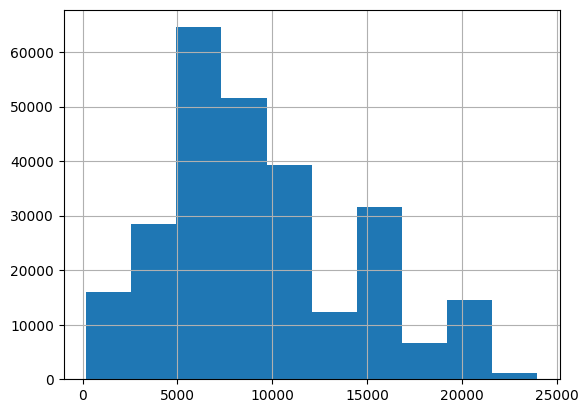

In [53]:
data['Purchase'].hist()

In [55]:
data['Purchase'].describe()

count    266058.000000
mean       9319.078607
std        4969.869589
min         185.000000
25%        5863.000000
50%        8060.000000
75%       12059.000000
max       23961.000000
Name: Purchase, dtype: float64

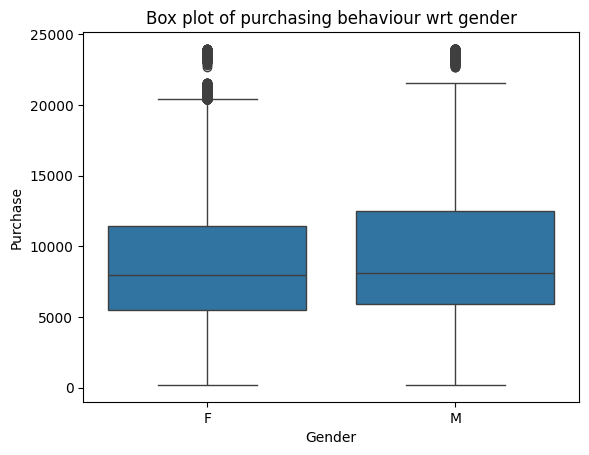

In [64]:
sns.boxplot(x=data['Gender'],y=data['Purchase']) #There does not appear to be any difference between purchasing behaviour of different genders
plt.title('Box plot of purchasing behaviour wrt gender')
plt.show()

In [61]:
data.groupby('Gender')['Purchase'].describe()[['min','mean','max']] #This shows some variation in the mean purchase amount between genders

,min,mean,max
Gender,,,
F,186.0,8801.945146,23948.0
M,185.0,9487.223737,23961.0


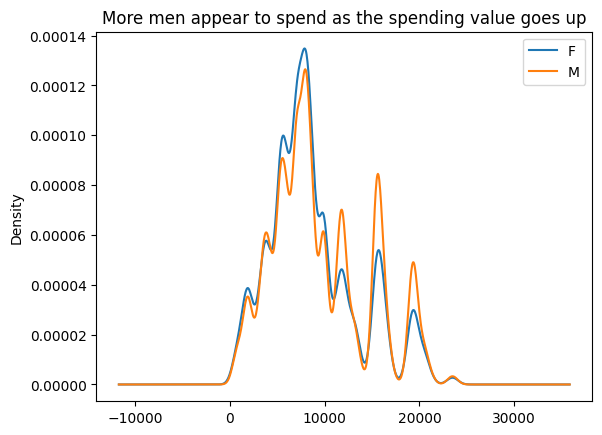

In [66]:
data.groupby('Gender')['Purchase'].plot(kind='kde')
plt.legend()
plt.title("More men appear to spend as the spending value goes up")
plt.show()

In [68]:
data.groupby('Age Group')['Purchase'].describe()[['min','mean', 'max']] #We can see that people of ages 0-17 and 51-55 have a higher min spending compared to other groups

,min,mean,max
Age Group,,,
0-17,375.0,9073.548287,23953.0
18-25,197.0,9187.097072,23958.0
26-35,185.0,9300.129061,23961.0
36-45,192.0,9395.097900,23949.0
46-50,186.0,9289.855728,23930.0
51-55,347.0,9627.854884,23913.0
55+,187.0,9415.780962,23958.0


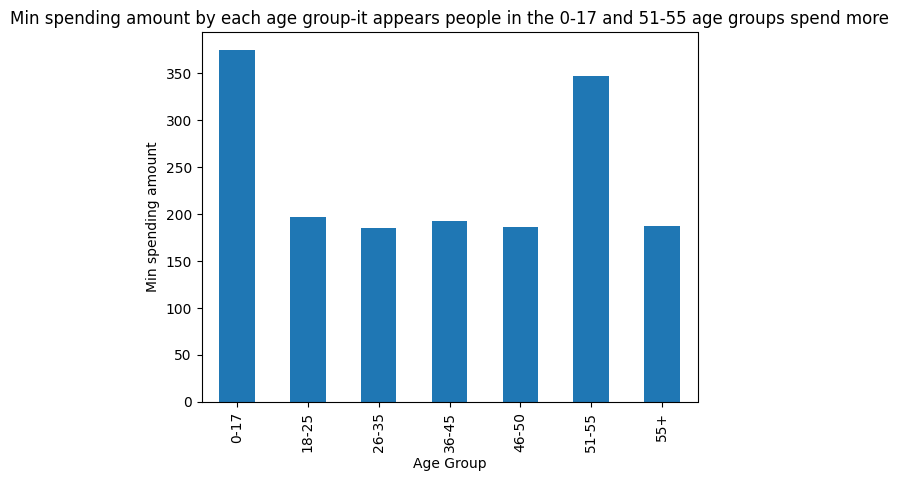

In [71]:
data.groupby('Age Group')['Purchase'].min().plot(kind='bar')
plt.title('Min spending amount by each age group-it appears people in the 0-17 and 51-55 age groups spend more')
plt.ylabel('Min spending amount')
plt.show()

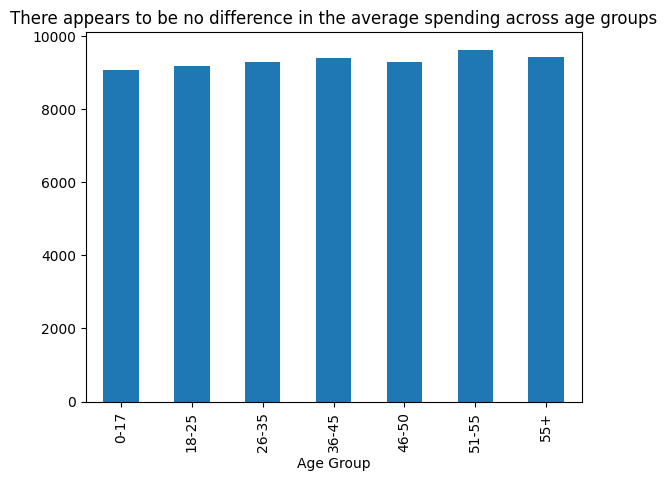

In [83]:
data.groupby('Age Group')['Purchase'].mean().plot(kind='bar')
plt.title('There appears to be no difference in the average spending across age groups')
plt.show()

<AxesSubplot: xlabel='Age Group'>

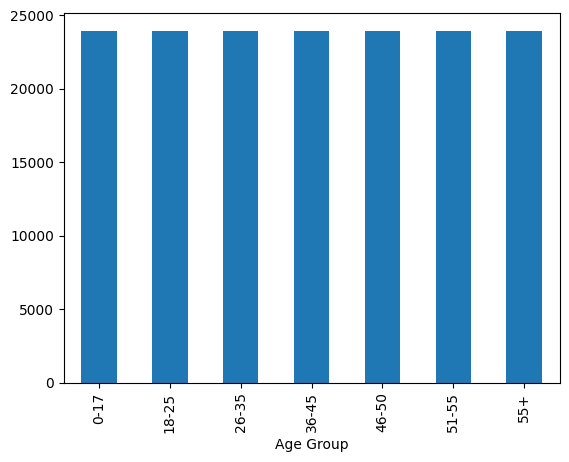

In [87]:
data.groupby('Age Group')['Purchase'].max().plot(kind='bar')
#There appears to be no significant difference in max spending amounts across age groups

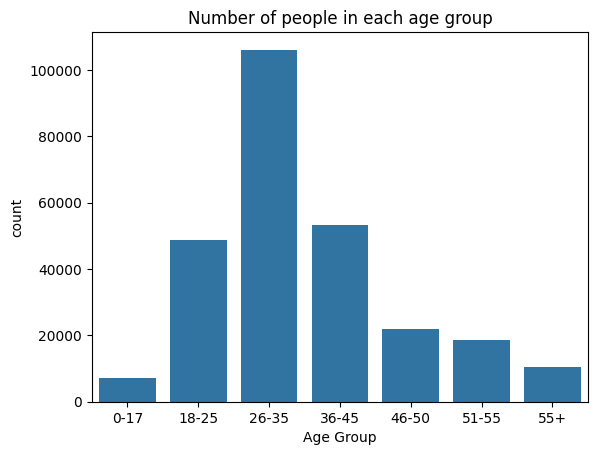

In [76]:
sns.countplot(x=data['Age Group'].sort_values(ascending=True))
plt.title('Number of people in each age group')
plt.show()

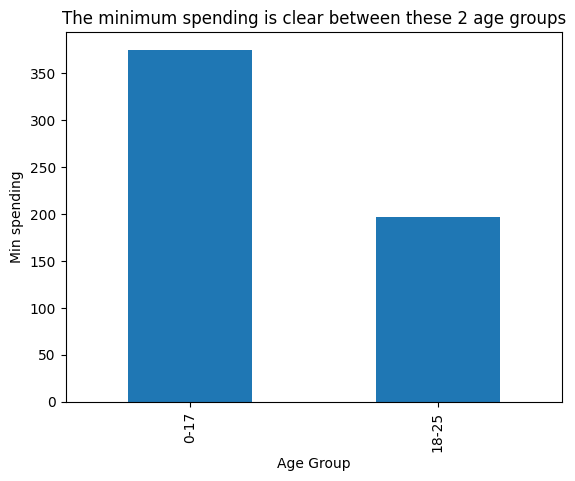

In [98]:
data[data['Age Group'].isin(['0-17','18-25'])].groupby('Age Group')['Purchase'].min().plot(kind='bar')
plt.title('The minimum spending is clear between these 2 age groups')
plt.ylabel('Min spending')
plt.show()

In [117]:
#so we compare the 2 distributions to see if the means are equal
#H0: There is no significant difference between purchase patterns pf age groups 0-17 and 18-25
#H1: The age group 0-17 makes lesser purchases compared to 18-25

In [127]:
stat_value, p=stest.ztest(x1=data[data['Age Group']=='0-17']['Purchase'], x2=data[data['Age Group']=='18-25']['Purchase'], value=0, alternative='smaller')

In [128]:
p

0.03632853935614255

In [122]:
#The p value shows 0.03
#Therefore we can reject the null hypothesis at 95% confidence or more, and say that the 0-17 age group spends less than the 18-25 age group

In [133]:
#Similarly we can try for 51-55 and 55+
#H0: There is no significant difference between purchase patterns of age groups 51-55 and 55+
#H1: The age group of 51-55 spends more than the age group 55+

In [134]:

stat, pvalue=stest.ztest(x1=data[data['Age Group']=='51-55']['Purchase'], x2=data[data['Age Group']=='55+']['Purchase'], value=0, alternative='larger')

In [135]:
pvalue

0.0002523248084981514

In [ ]:
#The p value is .0002 which shows that we can reject the null hypothesis, the age group of 51-55 indeed does spend more than 55+